## PCA(주성분 분석)
---

#### 데이터 준비

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import my_utils as my

In [4]:
from sklearn import datasets

iris = datasets.load_iris()

In [6]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df["target"] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### 데이터 분리

In [9]:
x_data = df.drop(["target"], axis=1)
x_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
y_data = df["target"]
y_data

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

#### 학습, 테스트 데이터 분리

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, stratify=y_data, test_size=0.2, random_state=1)

In [12]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


In [13]:
y_train.value_counts()

0    40
2    40
1    40
Name: target, dtype: int64

#### 정규화(표준화 진행)

In [14]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(x_train)
x_train = ss.transform(x_train)
x_train[:5]

array([[-0.91782384,  1.5241518 , -1.28391928, -1.0458439 ],
       [-1.51445906,  0.32717395, -1.33998562, -1.30595015],
       [ 1.23006294,  0.08777838,  0.73446911,  1.42516552],
       [-0.44051567, -1.10919948,  0.3420047 , -0.00541888],
       [-0.32118863, -0.39101277, -0.10652605,  0.12463425]])

In [22]:
y_train = y_train.values

#### 차원축소
* 주성분 분석 후 분산이 최대로 되는 축을 선택하고 축에 대해서 투영

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)   # n_comppnents는 유지할 축의 개수
x_train = pca.fit_transform(x_train)   # 4차원에서 2차원으로 축 감소
x_train[:5]

array([[-2.21094551, -0.99515822],
       [-2.39832443,  0.35123147],
       [ 1.85826464, -0.63251692],
       [ 0.24717299,  1.18165258],
       [-0.06047558,  0.47125606]])

In [19]:
df = pd.DataFrame(x_train, columns=["X_1", "X_2"])
df.head()

,X_1,X_2
0,-2.210946,-0.995158
1,-2.398324,0.351231
2,1.858265,-0.632517
3,0.247173,1.181653
4,-0.060476,0.471256


In [23]:
df["y_train"] = y_train.astype("int")
df.head()

,X_1,X_2,y_train
0,-2.210946,-0.995158,0
1,-2.398324,0.351231,0
2,1.858265,-0.632517,2
3,0.247173,1.181653,1
4,-0.060476,0.471256,1


<AxesSubplot: xlabel='X_1', ylabel='X_2'>

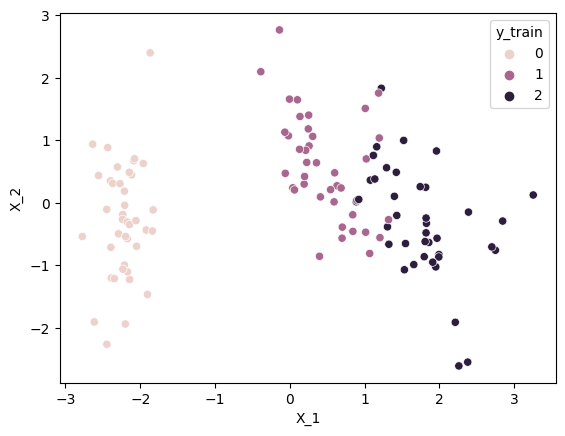

In [24]:
sns.scatterplot(data=df, x="X_1", y="X_2", hue="y_train")

In [37]:
df_x = df[["X_1", "X_2"]].values
df_y = df["y_train"].values

In [38]:
from sklearn.tree import DecisionTreeClassifier


clf = DecisionTreeClassifier(max_depth=3, random_state=1)
clf.fit(df_x, df_y)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [39]:
clf.score(df_x, df_y)

0.9583333333333334

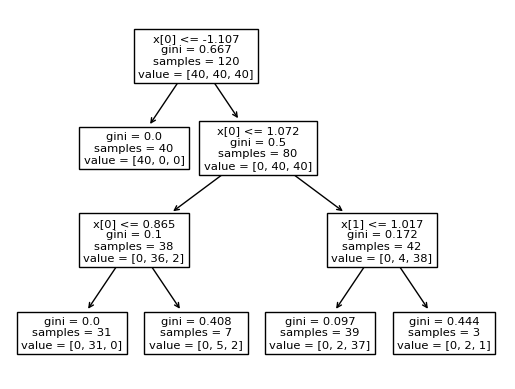

In [40]:
from sklearn.tree import plot_tree

plot_tree(clf)
plt.show()